# Import all necessary libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset

In [64]:
df = sns.load_dataset("titanic")

In [26]:
#df = pd.read_csv('titanic.csv')

# Display first few rows

In [65]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# Check dataset shape

In [67]:
print("Dataset shape:", df.shape)

Dataset shape: (891, 15)


# Display dataset info (types, missing values)

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


# Summary statistics of numerical columns

In [69]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


# Check missing values

In [70]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# Visualize missing values

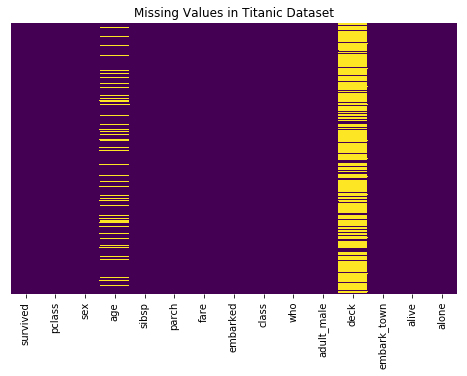

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values in Titanic Dataset")
plt.show()

# Fill missing numerical values with median

In [71]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# Fill missing categorical values with mode

In [72]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['deck'] = df['deck'].cat.add_categories("Unknown")

# Drop irrelevant columns

In [73]:
df.drop(columns=['deck', 'alive'], inplace=True)

# Countplot of categorical features

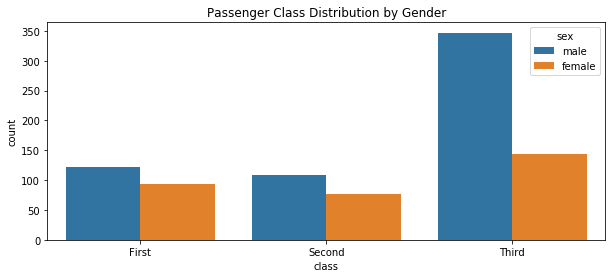

In [74]:
plt.figure(figsize=(10, 4))
sns.countplot(x='class', hue='sex', data=df)
plt.title("Passenger Class Distribution by Gender")
plt.show()

# Histogram of numerical features

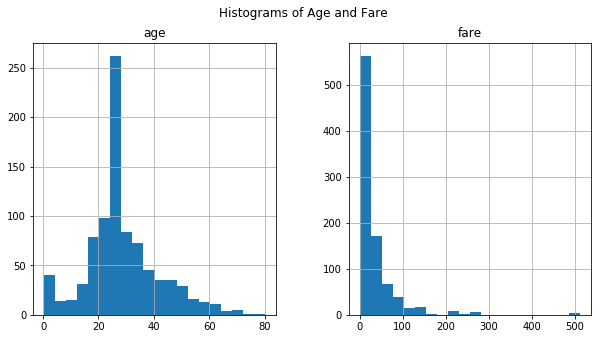

In [75]:
df[['age', 'fare']].hist(bins=20, figsize=(10, 5))
plt.suptitle("Histograms of Age and Fare")
plt.show()

# Boxplot for outliers in numerical columns

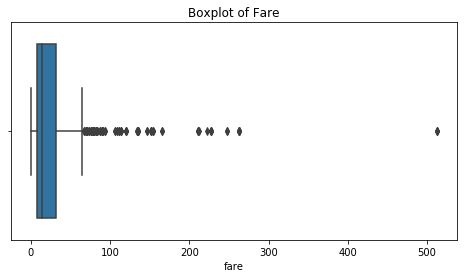

In [76]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare'])
plt.title("Boxplot of Fare")
plt.show()

# Encode categorical variables

In [77]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df = pd.get_dummies(df, columns=['embarked', 'class', 'who', 'alone','embark_town', 'adult_male'], drop_first=True)

# Normalize numerical features

In [78]:
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# Display the processed dataset

In [79]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,alone_True,embark_town_Queenstown,embark_town_Southampton,adult_male_True
0,0,3,1,-0.565736,1,0,-0.502445,0,1,0,1,1,0,0,0,1,1
1,1,1,0,0.663861,1,0,0.786845,0,0,0,0,0,1,0,0,0,0
2,1,3,0,-0.258337,0,0,-0.488854,0,1,0,1,0,1,1,0,1,0
3,1,1,0,0.433312,1,0,0.420730,0,1,0,0,0,1,0,0,1,0
4,0,3,1,0.433312,0,0,-0.486337,0,1,0,1,1,0,1,0,1,1


In [44]:
print(df.head())

   survived  pclass  sex       age  sibsp  parch      fare  adult_male  \
0         0       3    1 -0.565736      1      0 -0.502445        True   
1         1       1    0  0.663861      1      0  0.786845       False   
2         1       3    0 -0.258337      0      0 -0.488854       False   
3         1       1    0  0.433312      1      0  0.420730       False   
4         0       3    1  0.433312      0      0 -0.486337        True   

   embark_town  embarked_Q  embarked_S  class_Second  class_Third  who_man  \
0  Southampton           0           1             0            1        1   
1    Cherbourg           0           0             0            0        0   
2  Southampton           0           1             0            1        0   
3  Southampton           0           1             0            0        0   
4  Southampton           0           1             0            1        1   

   who_woman  alone_True  
0          0           0  
1          1           0  
2    

# Correlation heatmap

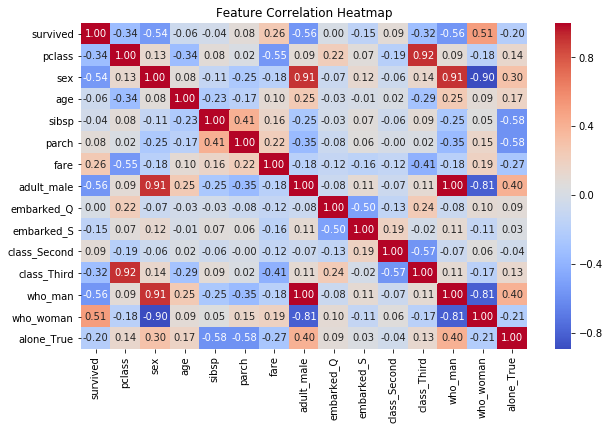

In [20]:
# Drop the 'embark_town' column for correlation calculation
df_corr = df.drop(columns=['embark_town'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()